# Import libraries

In [1]:
!pip install sklearn
!pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score



# Import data and data exploration
- The main goal of this project is to predict the CO (ppm) and Humidity (%r.h.) using other variables in the dataframe (exclude the time variable)

In [3]:
#read the file of first measurement (performed at 2016-09-30) as a data frame:
df = pd.read_csv('/Users/catherineduong/Desktop/STAT483/classification-UCL-temperature-of-Gas-Sensors-Array/gas-sensor-array-temperature-modulation/20160930_203718.csv')

In [4]:
#show the head of the data frame:
df.head(20)

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
5,1.544,0.0,55.8400,26.6200,240.8361,0.2020,60.1083,74.3444,81.5100,29.7970,72.9643,83.1477,80.5302,58.0412,39.2482,65.0981,67.8697,63.5316,50.3730,63.3641
6,1.854,0.0,55.8400,26.6200,240.7602,0.2010,64.1020,74.3444,76.4748,28.1797,72.4181,78.4368,79.0768,59.7614,40.4067,64.1416,61.6173,60.5007,50.6424,66.2847
7,2.163,0.0,55.8400,26.6200,240.6845,0.2009,62.6869,71.3877,73.8965,27.6523,64.4007,69.7912,72.5239,55.6363,39.6271,62.7987,65.8307,56.5195,50.3730,64.3090
8,2.472,0.0,55.8400,26.6200,240.6624,0.2009,54.8336,67.0368,69.2228,27.4429,64.9211,63.9055,63.5872,54.0730,40.5881,64.1416,63.9090,53.0811,48.9146,63.3641
9,2.781,0.0,55.8400,26.6200,240.6519,0.2003,51.2600,64.5303,61.4312,25.6881,54.7235,57.2118,59.6255,55.6363,40.9928,61.9071,60.3791,52.7888,48.3640,62.4461


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295719 entries, 0 to 295718
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295719 non-null  float64
 1   CO (ppm)            295719 non-null  float64
 2   Humidity (%r.h.)    295719 non-null  float64
 3   Temperature (C)     295719 non-null  float64
 4   Flow rate (mL/min)  295719 non-null  float64
 5   Heater voltage (V)  295719 non-null  float64
 6   R1 (MOhm)           295719 non-null  float64
 7   R2 (MOhm)           295719 non-null  float64
 8   R3 (MOhm)           295719 non-null  float64
 9   R4 (MOhm)           295719 non-null  float64
 10  R5 (MOhm)           295719 non-null  float64
 11  R6 (MOhm)           295719 non-null  float64
 12  R7 (MOhm)           295719 non-null  float64
 13  R8 (MOhm)           295719 non-null  float64
 14  R9 (MOhm)           295719 non-null  float64
 15  R10 (MOhm)          295719 non-nul

In [6]:
#show the list of total null values in each column:
# there are no nulls values within any of the variables
df.isnull().sum()

Time (s)              0
CO (ppm)              0
Humidity (%r.h.)      0
Temperature (C)       0
Flow rate (mL/min)    0
Heater voltage (V)    0
R1 (MOhm)             0
R2 (MOhm)             0
R3 (MOhm)             0
R4 (MOhm)             0
R5 (MOhm)             0
R6 (MOhm)             0
R7 (MOhm)             0
R8 (MOhm)             0
R9 (MOhm)             0
R10 (MOhm)            0
R11 (MOhm)            0
R12 (MOhm)            0
R13 (MOhm)            0
R14 (MOhm)            0
dtype: int64

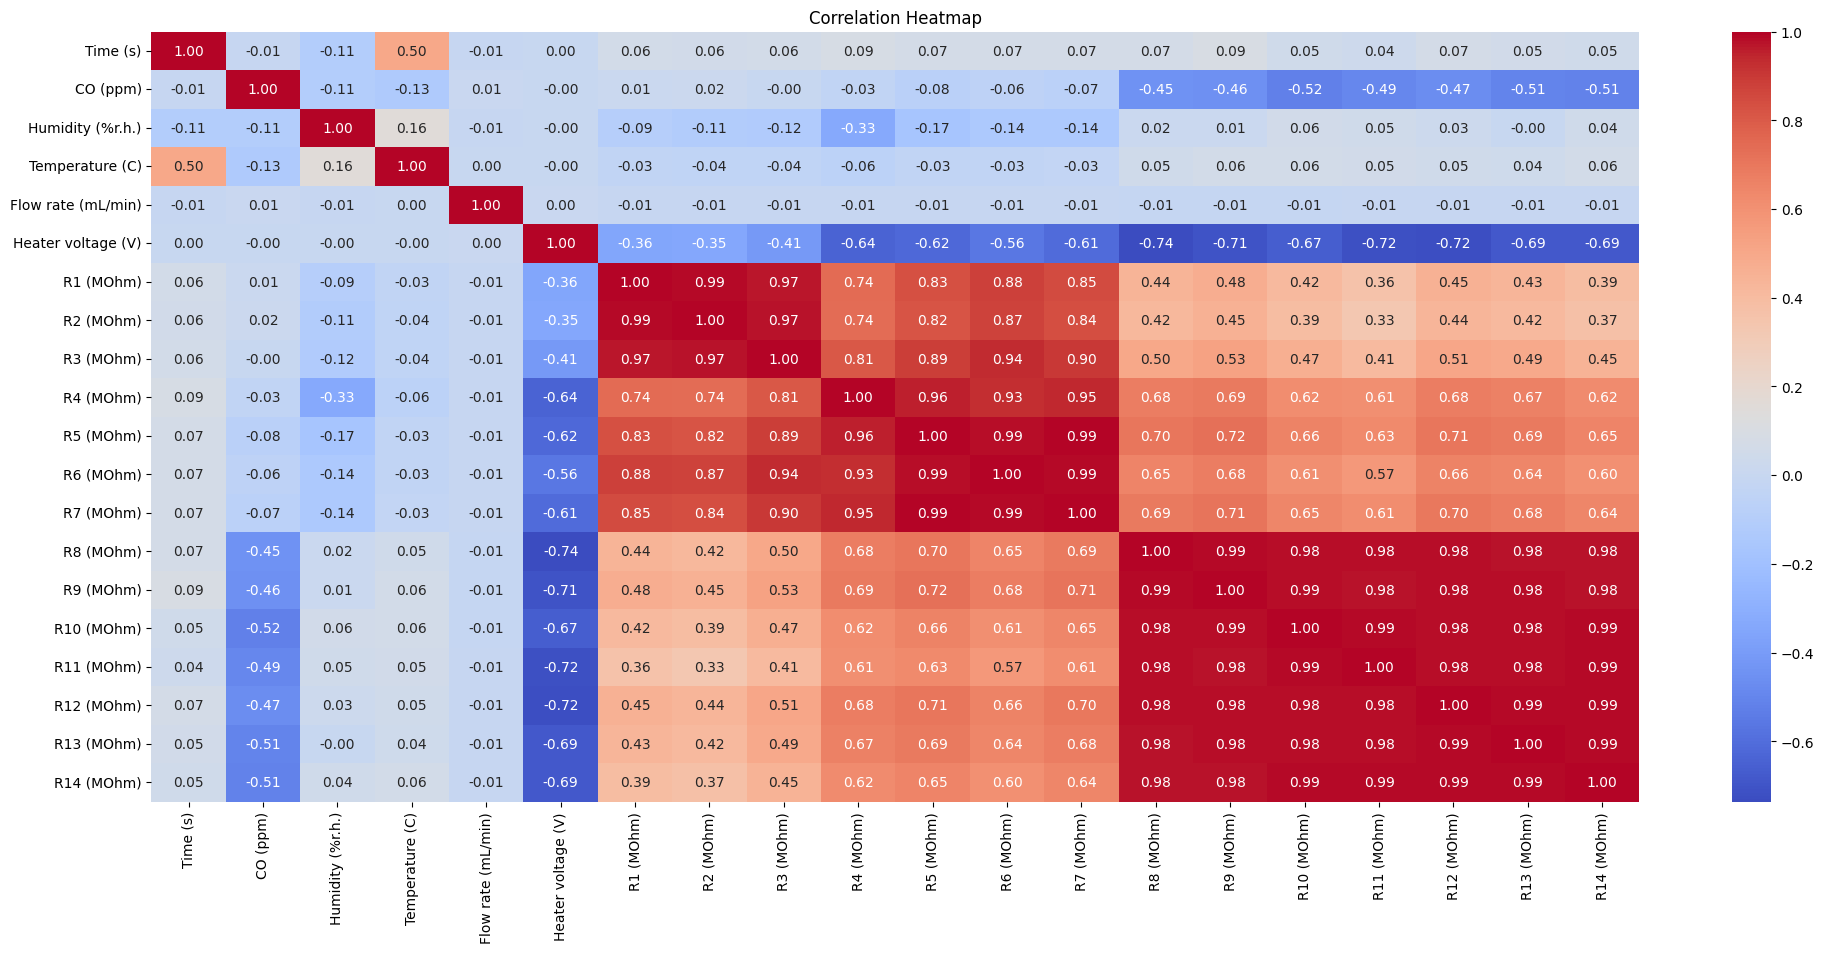

In [14]:
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(24, 10))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- We can see that from the heatmap, these two set of variables have significantly strong correlation with each other (above 0.85, in some instance even above .90): 
  - (R1, R2, R3, R4, R5, R6,R7), (R8, R9, R10, R11, R12, R13, R14)

In [111]:
# Figure out the range of humidity
print(df['Humidity (%r.h.)'].min())
print(df['Humidity (%r.h.)'].max())

17.5
71.96


In [112]:
# Figure out the range of COO
print(df['CO (ppm)'].min())
print(df['CO (ppm)'].max())

0.0
20.0


In [74]:
# Figure out the range of the temperature variable
print(df['Temperature (C)'].min())
print(df['Temperature (C)'].max())

23.7184
26.94


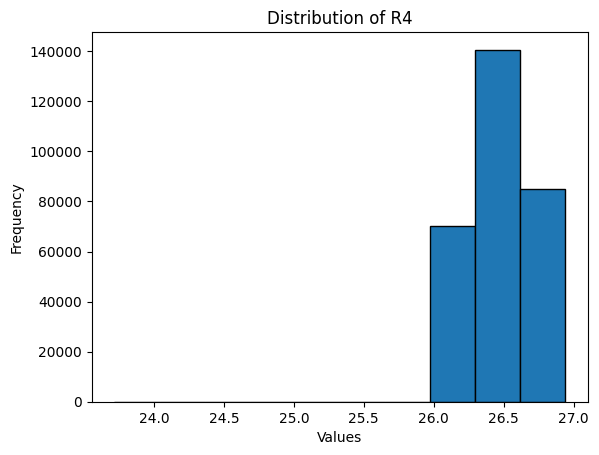

In [78]:
# Plot a histogram for temperature
plt.hist(df['Temperature (C)'], bins=10, edgecolor='k')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of temperature')
plt.show()

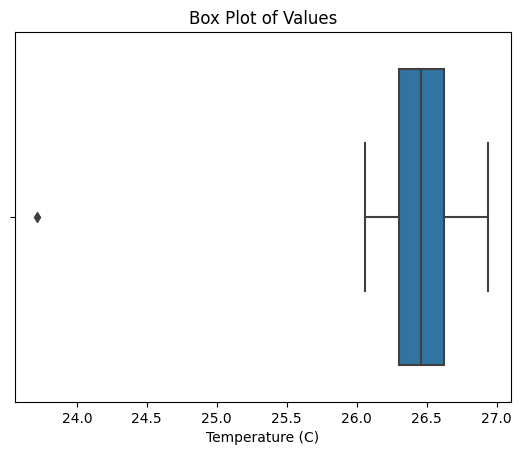

Outliers:
   Time (s)  CO (ppm)  Humidity (%r.h.)  Temperature (C)  Flow rate (mL/min)  \
0       0.0       0.0           49.7534          23.7184            233.2737   

   Heater voltage (V)  R1 (MOhm)  R2 (MOhm)  R3 (MOhm)  R4 (MOhm)  R5 (MOhm)  \
0              0.8993     0.2231     0.6365     1.1493     0.8483     1.2534   

   R6 (MOhm)  R7 (MOhm)  R8 (MOhm)  R9 (MOhm)  R10 (MOhm)  R11 (MOhm)  \
0     1.4449     1.9906     1.3303      1.448      1.9148      3.4651   

   R12 (MOhm)  R13 (MOhm)  R14 (MOhm)  
0      5.2144      6.5806      8.6385  
1


In [85]:
# Create a box plot
sns.boxplot(x=df['Temperature (C)'])
plt.title('Box Plot of Values')
plt.show()

# Calculate IQR and identify outliers
Q1 = df['Temperature (C)'].quantile(0.25)
Q3 = df['Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = pd.DataFrame(df[(df['Temperature (C)'] < lower_bound) | (df['Temperature (C)'] > upper_bound)])
print("Outliers:")
print(outliers.head())
print(len(outliers))
# there are 1 outlier only according to box plot

In [75]:
# See range of R4
print(df['R4 (MOhm)'].min())
print(df['R2 (MOhm)'].max())
# The range is pretty far apart from [0.0402,154.629]

0.0402
154.629


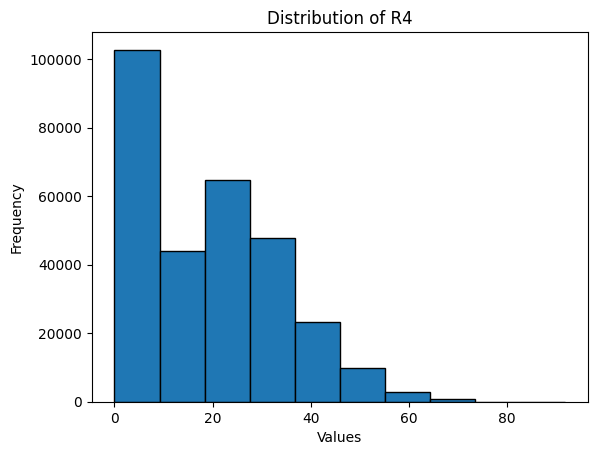

In [77]:
# Plot a histogram for R4 column
plt.hist(df['R4 (MOhm)'], bins=10, edgecolor='k')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of R4')
plt.show()

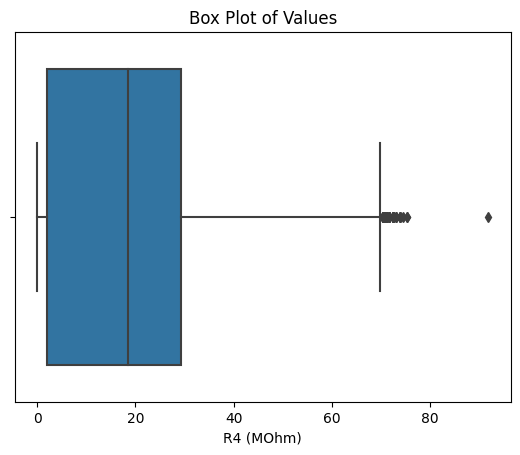

Outliers:
         Time (s)  CO (ppm)  Humidity (%r.h.)  Temperature (C)  \
130149  40031.474      2.22             18.63            26.14   
130218  40052.510      2.22             18.62            26.10   
130365  40097.331      2.22             18.62            26.10   
130510  40141.541      2.22             18.62            26.10   
130661  40187.575      2.22             18.62            26.10   
...           ...       ...               ...              ...   
283637  87192.487     17.78             22.00            26.58   
283701  87211.995     17.78             21.99            26.54   
283932  87282.821     17.78             21.99            26.54   
283995  87302.287     17.78             21.99            26.54   
283997  87302.906     17.78             21.99            26.54   

        Flow rate (mL/min)  Heater voltage (V)  R1 (MOhm)  R2 (MOhm)  \
130149            240.0590              0.2020    69.6423    88.5723   
130218            239.9739              0.2010    91.

In [79]:
# Create a box plot
sns.boxplot(x=df['R4 (MOhm)'])
plt.title('Box Plot of Values')
plt.show()

# Calculate IQR and identify outliers
Q1 = df['R4 (MOhm)'].quantile(0.25)
Q3 = df['R4 (MOhm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['R4 (MOhm)'] < lower_bound) | (df['R4 (MOhm)'] > upper_bound)]
print("Outliers:")
print(outliers)
#There are 77 outliers? in according to box plot of values 

# Modeling

In [99]:
#define object and featues in the data frame:
X = df.drop(['Time (s)','Humidity (%r.h.)','CO (ppm)','R2 (MOhm)','R3 (MOhm)','R6 (MOhm)','R7 (MOhm)','R9 (MOhm)','R10 (MOhm)',
            'R11 (MOhm)'],axis=1)
y = df[['Humidity (%r.h.)','CO (ppm)']]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Model Coefficients:
Intercept: [-28.0332222   77.80079385]
Coefficients: [[ 3.26707009e+00 -1.15206407e-02 -1.07853468e+01 -3.45197796e-02
  -1.86218286e+00  8.70028362e-01  1.15560002e-01  2.10713895e-01
  -7.03479042e-01  3.21973908e-01]
 [-2.28979822e+00  1.28132605e-02 -1.15012657e+01  1.83418363e-02
   1.26321888e-01  6.08160141e-04 -7.45993988e-03  1.39945461e-01
  -5.59967414e-01  2.91243227e-04]]

Evaluation Metrics:
Mean Squared Error (MSE): 46.499082214867514
R-squared (R2): 0.5338550718694268


In [103]:
import xgboost as xgb

# Create a dictionary to specify which columns are your target variables
targets = {'target1': y_train['target1_column_name'], 'target2': y_train['target2_column_name']}

# Create a DMatrix for your input data
dtrain = xgb.DMatrix(X_train, label=targets)

# Specify XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions for the test data
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

# y_pred will contain predictions for 'target1' and 'target2'


KeyError: 'target1_column_name'

In [106]:

# Create an XGBoost regression model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test) 

# Calculate the Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print("Model Coefficients:")
print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Model Coefficients:

Evaluation Metrics:
Mean Squared Error (MSE): 27.53673067397124
R-squared (R2): 0.757973415483134


In [109]:
print(y_pred)
y_test

[[34.96344    6.626207 ]
 [54.644207   1.1974126]
 [33.00166   15.378995 ]
 ...
 [50.065296  18.035563 ]
 [35.42074   18.677382 ]
 [29.649666  14.05002  ]]


,Humidity (%r.h.),CO (ppm)
232540,36.1700,6.67
166793,68.6100,0.00
254566,37.7596,15.56
40970,52.2800,0.00
285710,45.6300,17.78
...,...,...
132125,25.2800,13.33
100103,46.3490,0.00
10148,56.8400,20.00
276418,24.2100,20.00


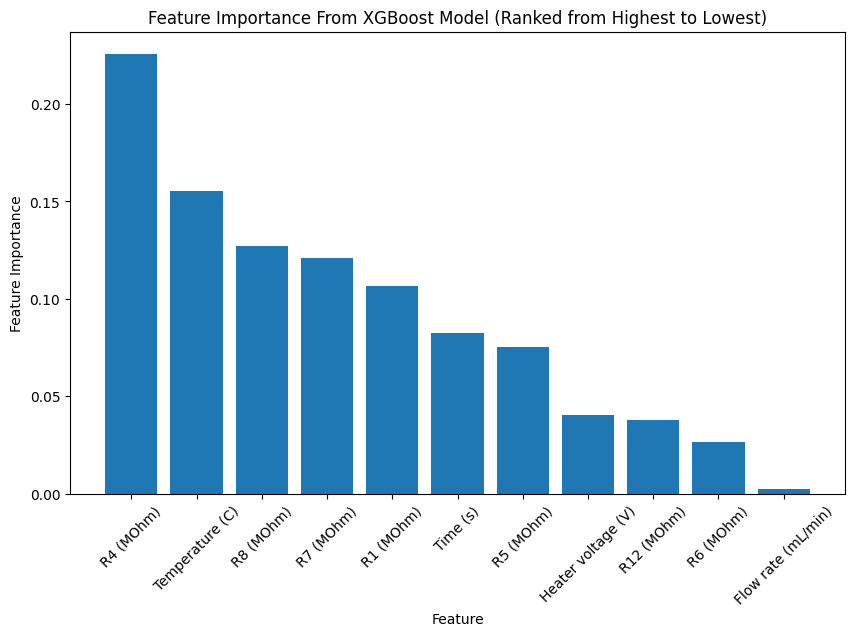

In [93]:
features = df.drop(['Humidity (%r.h.)','CO (ppm)','R2 (MOhm)','R3 (MOhm)','R9 (MOhm)','R10 (MOhm)',
            'R11 (MOhm)'],axis=1)
feature_names = features.columns.tolist()
feature_importance = model.feature_importances_
# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = [feature_importance[i] for i in sorted_indices]

# Create a bar plot of sorted feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_names)), sorted_importances, tick_label=sorted_feature_names)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance From XGBoost Model (Ranked from Highest to Lowest)")
plt.xticks(rotation=45)
plt.show()

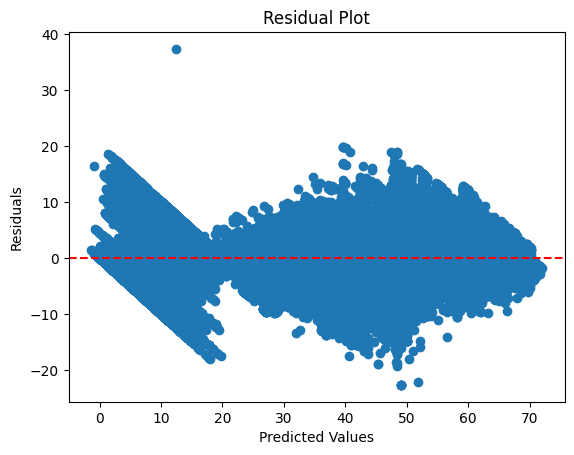

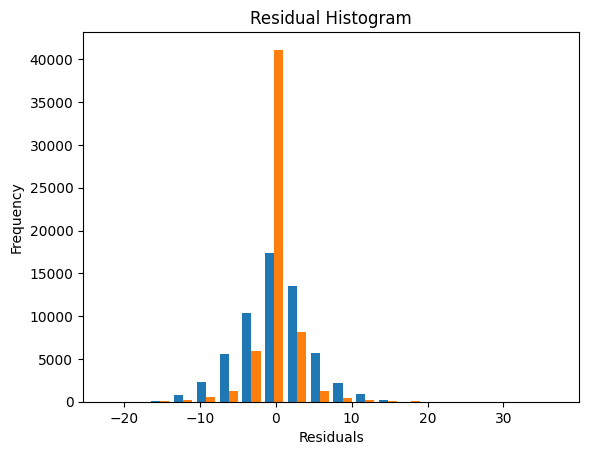

In [94]:
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title("Residual Plot")
plt.show()

# Histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()


# Conclusion
- XGBoost seems to perform better than multiple linear regression according to the MSE score (14.226 < 44.437).